In [1]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer

# Load the data from CSV
data1 = pd.read_csv("/content/drive/MyDrive/BERT/patents_data000000000000.csv")

In [3]:
data1.shape

(55486, 4)

In [4]:
data2 = pd.read_csv("/content/drive/MyDrive/BERT/patents_data000000000001.csv",encoding='unicode_escape',on_bad_lines = "skip")


In [5]:
data2.shape

(55835, 4)

In [6]:
data3 = pd.read_csv("/content/drive/MyDrive/BERT/patents_data000000000002.csv",encoding='unicode_escape',on_bad_lines = "skip")


In [7]:
data3.shape

(55477, 4)

In [8]:
data4 = pd.read_csv("/content/drive/MyDrive/BERT/patents_data000000000003.csv",encoding='unicode_escape',on_bad_lines = "skip")


In [9]:
data4.shape

(55553, 4)

In [10]:
data5 = pd.read_csv("/content/drive/MyDrive/BERT/patents_data000000000004.csv",encoding='unicode_escape',on_bad_lines = "skip")

In [11]:
data5.shape

(55446, 4)

In [12]:
data1.head()

,cpc_ids,id,date,text
0,"B01D,C01B,C23F,C25D,H01M,Y02E,Y10T",8562847,2013-10-22,1. A production method of a hydrogen productio...
1,G11C,8386895,2013-02-26,1. A method comprising: storing states in one ...
2,"B65H,G03G",8550451,2013-10-08,"1. An image-forming apparatus, comprising: a b..."
3,"H01H,H01R",8405253,2013-03-26,1. A system for coupling with a first eService...
4,"G06F,H04L",8438219,2013-05-07,"1. A system, for generating a web page portal ..."


In [13]:
data2.head()

,cpc_ids,id,date,text
0,"B23P,B60J,Y10T",8398808,2013-03-19,1. A method for attaching a sealing profile to...
1,"B60B,F16D",8596421,2013-12-03,"1. A stopper apparatus for a roller wheel, the..."
2,"E02F,G05D",8457828,2013-06-04,1. A system for controlling operation of a too...
3,"H02K,Y02E",8421253,2013-04-16,1. An axial flux generator for generating elec...
4,"B01J,B82Y,C01G,C01P,C07F,H01M,Y02E",8492304,2013-07-23,1. A manufacturing method of making an iron ox...


In [14]:
data3.head()

,cpc_ids,id,date,text
0,F01L,8555836,2013-10-15,1. A camshaft phaser for controllably varying ...
1,"B60P,E04H",8439426,2013-05-14,"1. A travel trailer, comprising: a frame that ..."
2,"G02F,G09G",8477124,2013-07-02,1. A semiconductor device having a driver circ...
3,"A61M,Y10T",8573248,2013-11-05,1. A gas flow valve comprising: a gas flow con...
4,"F16M,G03B",8469613,2013-06-25,1. A support assembly for a camera having lens...


In [15]:
data4.head()

,cpc_ids,id,date,text
0,"A61B,A61G",8531307,2013-09-10,1. A person support surface comprising at leas...
1,B41J,8596739,2013-12-03,"1. A printing method, comprising: providing a ..."
2,"A61P,C07D",8389526,2013-03-05,"1. A compound of the formula (I), wherein R R ..."
3,"A62C,B64D,F41F,F42B",8601929,2013-12-10,1. An incendiary dispensing system arranged fo...
4,"G01J,H01L,H04N",8431901,2013-04-30,1. A method for controlling the resistance of ...


In [16]:
data5.head()

,cpc_ids,id,date,text
0,H04L,8396985.0,2013-03-12,1. A method of preventing replay attacks on a ...
1,"G10L,H04S",8615088.0,2013-12-24,1. An apparatus for processing an audio signal...
2,"G11B,H04N",8526786.0,2013-09-03,1. A non-transitory machine readable informati...
3,"A47L,A61L,C11D",8461089.0,2013-06-11,1. A dishwashing detergent composition compris...
4,H01R,8348699.0,2013-01-08,1. An electrical connector to be connected to ...


In [17]:
df = pd.concat([data1, data2, data3, data4,data5], axis=0, ignore_index=True)


In [18]:
df.head()

,cpc_ids,id,date,text
0,"B01D,C01B,C23F,C25D,H01M,Y02E,Y10T",8562847.0,2013-10-22,1. A production method of a hydrogen productio...
1,G11C,8386895.0,2013-02-26,1. A method comprising: storing states in one ...
2,"B65H,G03G",8550451.0,2013-10-08,"1. An image-forming apparatus, comprising: a b..."
3,"H01H,H01R",8405253.0,2013-03-26,1. A system for coupling with a first eService...
4,"G06F,H04L",8438219.0,2013-05-07,"1. A system, for generating a web page portal ..."


In [19]:
df.shape

(277797, 4)

In [20]:
df.duplicated().sum()

0

In [21]:
df = df.dropna()


In [22]:
from sklearn.preprocessing import MultiLabelBinarizer
#Filtering just general category
# df_claim_cpc_new_full['group_id'] = df_claim_cpc_new_full.group_id.apply(lambda x:[a.split(',')[0] for a in x])
df['cpc_ids'] = df['cpc_ids'].str.split(',')
df['cpc_ids'] = df['cpc_ids'].apply(lambda x:pd.Series(x).unique())

# Tranforming output variable to one-hot encoded output features
mlb = MultiLabelBinarizer(sparse_output=True)

# Construing final dataframe
df = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('cpc_ids')),
                index=df.index,
                columns=mlb.classes_))
# df = df.drop("group_id",axis=1)

In [23]:
df.head()

,id,date,text,A01B,A01C,A01D,A01F,A01G,A01H,A01J,...,Y02B,Y02C,Y02D,Y02E,Y02P,Y02T,Y02W,Y04S,Y10S,Y10T
0,8562847.0,2013-10-22,1. A production method of a hydrogen productio...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,8386895.0,2013-02-26,1. A method comprising: storing states in one ...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8550451.0,2013-10-08,"1. An image-forming apparatus, comprising: a b...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8405253.0,2013-03-26,1. A system for coupling with a first eService...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8438219.0,2013-05-07,"1. A system, for generating a web page portal ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_raw = df
df.shape

(277795, 656)

In [25]:
categories_cols = df.columns[3:]
labels = df[categories_cols]
#Removing labels which occur only once.
# labels_to_remove_1 = labels_1[labels_1.columns[labels_1.sum(axis=0) <30]].columns

labels_to_remove = labels[labels.columns[labels.sum(axis=0) <1000]].columns

In [26]:
labels_to_remove

Index(['A01B', 'A01C', 'A01D', 'A01F', 'A01G', 'A01J', 'A01K', 'A01L', 'A01M',
       'A21B',
       ...
       'H04K', 'H04Q', 'H04S', 'H05C', 'H05F', 'H05G', 'H05H', 'Y02C', 'Y02W',
       'Y04S'],
      dtype='object', length=544)

In [27]:
df['text'] = df['text'].str[3:]


In [28]:
df.head()

,id,date,text,A01B,A01C,A01D,A01F,A01G,A01H,A01J,...,Y02B,Y02C,Y02D,Y02E,Y02P,Y02T,Y02W,Y04S,Y10S,Y10T
0,8562847.0,2013-10-22,A production method of a hydrogen production f...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,8386895.0,2013-02-26,A method comprising: storing states in one or ...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8550451.0,2013-10-08,"An image-forming apparatus, comprising: a body...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8405253.0,2013-03-26,A system for coupling with a first eService co...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8438219.0,2013-05-07,"A system, for generating a web page portal cus...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
condition = ~(df[labels_to_remove].eq(1).any(axis=1))
df = df[condition]


In [32]:
df.shape


(191783, 656)

In [33]:
df_pre_new = df.drop(labels_to_remove,axis=1)
df_pre_new.shape

(191783, 112)

In [34]:
from sklearn.model_selection import train_test_split
# split into train test sets
df_claim_train, df_claim_test = train_test_split(df_pre_new, test_size=0.08)

In [35]:
df_claim_test.shape


(15343, 112)

In [36]:
df_claim_train.shape


(176440, 112)

In [37]:
categories_cols = df_claim_train.columns[3:]
labels = df_claim_train[categories_cols]
#Removing labels which occur only once.
# labels_to_remove_1 = labels_1[labels_1.columns[labels_1.sum(axis=0) <30]].columns

labels_to_remove_train = labels[labels.columns[labels.sum(axis=0) <2000]].columns


In [38]:
labels_to_remove_train

Index(['A01H', 'A01N', 'A23L', 'A61L', 'A61Q', 'A63B', 'A63F', 'B01D', 'B01J',
       'B23K', 'B29C', 'B29L', 'B32B', 'B60K', 'B60L', 'B60R', 'B60W', 'B62D',
       'B65D', 'B65H', 'B82Y', 'C01B', 'C04B', 'C07C', 'C07F', 'C08F', 'C08G',
       'C08J', 'C08K', 'C08L', 'C09D', 'C09K', 'C12P', 'C12Q', 'C23C', 'E21B',
       'F01D', 'F01N', 'F02D', 'F02M', 'F05D', 'F16D', 'F16H', 'F16K', 'F21V',
       'F21Y', 'G01B', 'G01C', 'G01S', 'G03B', 'G03F', 'G05B', 'G07F', 'G08B',
       'G10L', 'G16H', 'H01F', 'H01H', 'H01J', 'H01Q', 'H01R', 'H01S', 'H02J',
       'H02K', 'H02M', 'H03F', 'H03K', 'H03M', 'H04J', 'H04R', 'H05B', 'Y02A',
       'Y02B', 'Y02P', 'Y02T', 'Y10S'],
      dtype='object')

In [39]:
# Create a condition to filter rows
condition_train = ~(df_claim_test[labels_to_remove_train].eq(1).any(axis=1))

# Apply the condition to filter the DataFrame
df_claim_test = df_claim_test[condition_train]

In [40]:
df_claim_test.shape


(10078, 112)

In [41]:
df_claim_test.columns


Index(['id', 'date', 'text', 'A01H', 'A01N', 'A23L', 'A61B', 'A61F', 'A61K',
       'A61L',
       ...
       'H05B', 'H05K', 'Y02A', 'Y02B', 'Y02D', 'Y02E', 'Y02P', 'Y02T', 'Y10S',
       'Y10T'],
      dtype='object', length=112)

In [42]:
df_claim_test.shape


(10078, 112)

In [43]:
df_claim_train.shape


(176440, 112)

In [44]:
df_claim_test.columns[3:]


Index(['A01H', 'A01N', 'A23L', 'A61B', 'A61F', 'A61K', 'A61L', 'A61M', 'A61N',
       'A61P',
       ...
       'H05B', 'H05K', 'Y02A', 'Y02B', 'Y02D', 'Y02E', 'Y02P', 'Y02T', 'Y10S',
       'Y10T'],
      dtype='object', length=109)

In [45]:
df_claim_train_l = df_claim_train.iloc[:, 3:]
df_claim_test_l = df_claim_test.iloc[:, 3:]

In [46]:
s = df_claim_train_l.sum()
d = df_claim_test_l.sum()
print(s)
print(d)

A01H     722
A01N     677
A23L     228
A61B    8663
A61F    3433
        ... 
Y02E    3445
Y02P    1946
Y02T    1957
Y10S    1904
Y10T    9299
Length: 109, dtype: int64
A01H      0
A01N      0
A23L      0
A61B    631
A61F    213
       ... 
Y02E    140
Y02P      0
Y02T      0
Y10S      0
Y10T    260
Length: 109, dtype: int64


<Axes: >

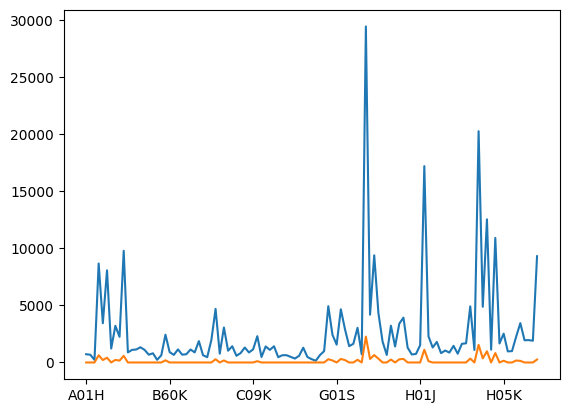

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

s.plot()
d.plot()
